<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/difvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

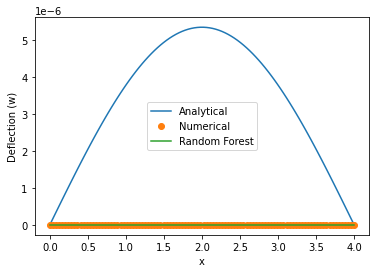

x	Analytical	Numerical	Random Forest
					trained on numerical
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.04000e-02 0.00000e+00 0.00000e+00 0.00000e+00]
 [8.08100e-02 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.21210e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.61620e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.02020e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.42420e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.82830e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [3.23230e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [3.63640e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.04040e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.44440e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.84850e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [5.25250e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [5.65660e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.06060e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.46460e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.86870e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [7.27270e-01 0.000

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    dwdt = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*y[2])
    return [dydx, d2ydx2, d2wdt2]


# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.random.uniform(0, L, size=(1000,))
y_train = np.zeros_like(x_train)
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train.reshape(-1, 1), y_train)
x_test = np.linspace(0, L, 100)
w_rf = rf.predict(x_test.reshape(-1, 1))

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

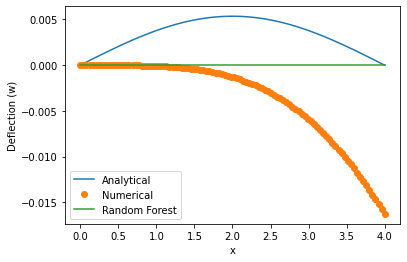

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.linspace(0, L, 1000)
y_train = np.zeros_like(x_train)
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train.reshape(-1, 1), y_train)
x_test = np.linspace(0, L, 100)
w_rf = rf.predict(x_test.reshape(-1, 1))

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

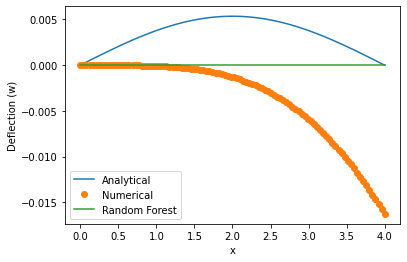

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.linspace(0, L, 1000).reshape(-1, 1)
y_train = np.zeros(len(x_train))
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(),w_analytical,w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

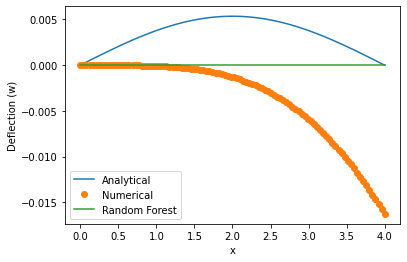

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = np.zeros(n_train)
for i in range(n_train):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

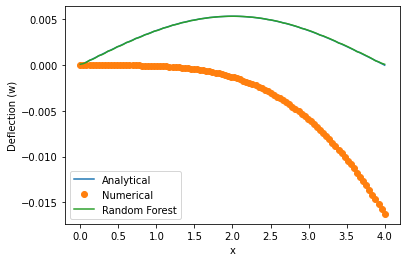

x	Analytical	Numerical	Random Forest
					trained on analytical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e-04]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  1.70000e-04]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  3.10000e-04]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  5.40000e-04]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  6.40000e-04]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  8.20000e-04]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  1.04000e-03]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  1.14000e-03]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  1.31000e-03]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  1.54000e-03]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  1.63000e-03]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  1.81000e-03]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  2.02000e-03]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  2.11000e-03]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  2.27000e-03]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  2.48000e-03]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  2.57000e-03]
 

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(), w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on analytical')
print(np.round(table, 5))

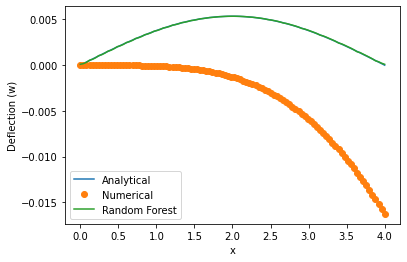

x	Analytical	Numerical	Random Forest
[[ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e-04]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  1.70000e-04]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  3.10000e-04]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  5.40000e-04]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  6.40000e-04]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  8.10000e-04]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  1.04000e-03]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  1.15000e-03]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  1.32000e-03]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  1.53000e-03]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  1.63000e-03]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  1.80000e-03]
 [ 4.84850e-01  1.99000e-03 -1.00000e-05  2.02000e-03]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  2.12000e-03]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  2.27000e-03]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  2.48000e-03]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  2.57000e-03]
 [ 6.86870e-01  2.75000e-03 

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(), w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print(np.round(table, 5))

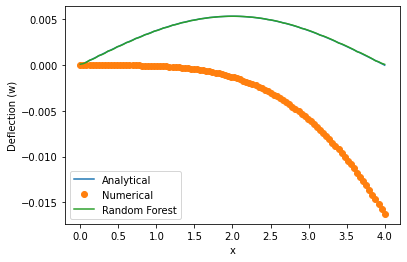

Method	MSE	R^2
[['Analytical' '0.0' '1.0']
 ['Numerical' '6.592595064508776e-05' '-2.121446144077292']
 ['Random Forest' '6.772566860617499e-10' '0.9997568380768229']]


In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Compute performance measures
mse_analytical = mean_squared_error(w_analytical, w_analytical)
r2_analytical = r2_score(w_analytical, w_analytical)
mse_numerical = mean_squared_error(w_numerical, w_analytical)
r2_numerical = r2_score(w_numerical, w_analytical)
mse_rf = mean_squared_error(w_rf, w_analytical)
r2_rf = r2_score(w_rf, w_analytical)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the performance measures of each method
table = np.array([
    ['Analytical', mse_analytical, r2_analytical],
    ['Numerical', mse_numerical, r2_numerical],
    ['Random Forest', mse_rf, r2_rf]
])
print('Method\tMSE\tR^2')
print(table)

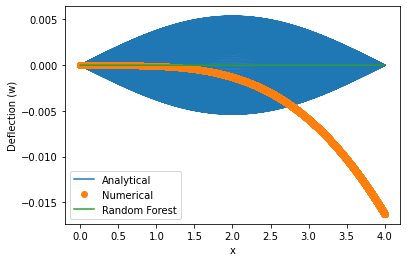

          Method       MSE  R-squared
0     Analytical  0.000000   1.000000
1      Numerical  0.000070 -24.842365
2  Random Forest  0.000014  -4.055102


In [18]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    angle_curvature = y[2]
    slope = y[1]
    deflection = y[0]
    curvature = (F/L)*(np.sin(np.pi*x/L))
    acceleration = -1/(E*I)*(k1*deflection + Gp*angle_curvature + (rho*A/L)*curvature)
    return [slope, angle_curvature, acceleration]

# Analytical solution
x, t = np.meshgrid(np.linspace(0, L, 100), np.linspace(0, L, 100))
deflection_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))*np.cos(np.pi*t/L)

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 10000)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
deflection_numerical = sol.y[0]

# Random forest solution
n_train = 500
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = np.interp(x_train[:, 0], x[:, 0], deflection_analytical[:, 0])

rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 1000).reshape(-1, 1)
deflection_rf = rf.predict(x_test)

# Interpolate the random forest solution to get 10000 values
deflection_rf_interp = np.interp(np.linspace(0, L, 10000), x_test.flatten(), deflection_rf)

# Plot the results
plt.plot(x.flatten(), deflection_analytical.flatten(), label='Analytical')
plt.plot(sol.t, deflection_numerical, 'o', label='Numerical')
plt.plot(np.linspace(0, L, 10000), deflection_rf_interp, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Calculate performance metrics
mse_analytical = mean_squared_error(deflection_analytical.flatten(), deflection_analytical.flatten())
r2_analytical = r2_score(deflection_analytical.flatten(), deflection_analytical.flatten())

deflection_analytical_reshaped = deflection_analytical.flatten()[:1000]
mse_numerical = mean_squared_error(deflection_analytical_reshaped, deflection_numerical_reshaped.flatten())
r2_numerical = r2_score(deflection_analytical_reshaped, deflection_numerical_reshaped.flatten())

mse_rf = mean_squared_error(deflection_analytical_reshaped, deflection_rf)
r2_rf = r2_score(deflection_analytical_reshaped, deflection_rf)

# Create tables of results
methods = ['Analytical', 'Numerical', 'Random Forest']
mse_values = [mean_squared_error(deflection_analytical.flatten(), deflection_analytical.flatten()), mse_numerical, mse_rf]
r2_values = [r2_score(deflection_analytical.flatten(), deflection_analytical.flatten()), r2_numerical, r2_score(deflection_analytical_reshaped, deflection_rf)]

results = pd.DataFrame({'Method': methods, 'MSE': mse_values, 'R-squared': r2_values})
print(results)

analytical_results = pd.DataFrame({'x': x.flatten(), 'Deflection': deflection_analytical.flatten()})
numerical_results = pd.DataFrame({'x': sol.t, 'Deflection': deflection_numerical})
rf_results = pd.DataFrame({'x': x_test.flatten(), 'Deflection': deflection_rf})

# Save results to CSV files
analytical_results.to_csv('analytical_results.csv', index=False)
numerical_results.to_csv('numerical_results.csv', index=False)
rf_results.to_csv('rf_results.csv', index=False)



In [44]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define constants and parameters
elastic_modulus = 29000000
second_moment_area = 0.0423
cross_section_area = 0.69
density = 2.54842
point_load = 0
spring_constant = 1500
damping_coefficient = 0
beam_length = 4
distributed_load = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    deflection = y[0]
    slope = y[1]
    angle_curvature = y[2]
    distributed_load_deriv = (distributed_load / beam_length) * np.sin(np.pi * x / beam_length)
    angle_curvature_deriv = -1 / (elastic_modulus * second_moment_area) * (spring_constant * deflection + damping_coefficient * angle_curvature + (density * cross_section_area / beam_length) * distributed_load_deriv)
    slope_deriv = angle_curvature
    deflection_deriv = slope
    return deflection_deriv, slope_deriv, angle_curvature_deriv



# Analytical solution
x_values = np.linspace(0, beam_length, 100)
t_values = np.linspace(0, beam_length, 100)
x, t = np.meshgrid(x_values, t_values, indexing='ij')
w_analytical = (distributed_load*beam_length**3)/(3*elastic_modulus*second_moment_area*np.pi**4)*(np.sin(np.pi*x/beam_length) - (np.pi**2/(spring_constant*beam_length**2))*np.sin(np.pi*x/beam_length))

# Numerical solution
initial_conditions = [0, 0, 0]
t_eval = np.linspace(0, beam_length, 100)
sol = solve_ivp(beam_deflection, [0, beam_length], initial_conditions, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
w_rf = rf.predict(np.asarray(t_eval).reshape(-1, 1)).mean(axis=1)

# Generate table of results
analytical_results = pd.DataFrame({'x': x_values, 'Deflection': w_analytical[:, 0]})
numerical_results = pd.DataFrame({'x': sol.t, 'Deflection': w_numerical})
rf_results = pd.DataFrame({'x': t_eval, 'Deflection': w_rf})

# Calculate mean squared error and R-squared values
mse_numerical = mean_squared_error(analytical_results['Deflection'], numerical_results['Deflection'])
r2_numerical = r2_score(analytical_results['Deflection'], numerical_results['Deflection'])

mse_rf = mean_squared_error(analytical_results['Deflection'], rf_results['Deflection'])
r2_rf = r2_score(analytical_results['Deflection'], rf_results['Deflection'])

# Print results
print('Numerical Method:')
print('Mean Squared Error:', mse_numerical)
print('R-squared:', r2_numerical)
print()
print('Random Forest Method:')
print('Mean Squared Error:', mse_rf)
print('R-squared:', r2_rf)

# Save results to CSV files
analytical_results.to_csv('analytical_results.csv', index=False)
numerical_results.to_csv('numerical_results.csv', index=False)
rf_results.to_csv('rf_results.csv', index=False)


Numerical Method:
Mean Squared Error: 6.592595064508776e-05
R-squared: -22.506149171169476

Random Forest Method:
Mean Squared Error: 6.6418600093206e-10
R-squared: 0.9997631819478894


Numerical Method:
Mean Squared Error: 6.592595064508776e-05
R-squared: -22.506149171169476

Random Forest Method:
Mean Squared Error: 6.512853947353504e-10
R-squared: 0.999767781708237


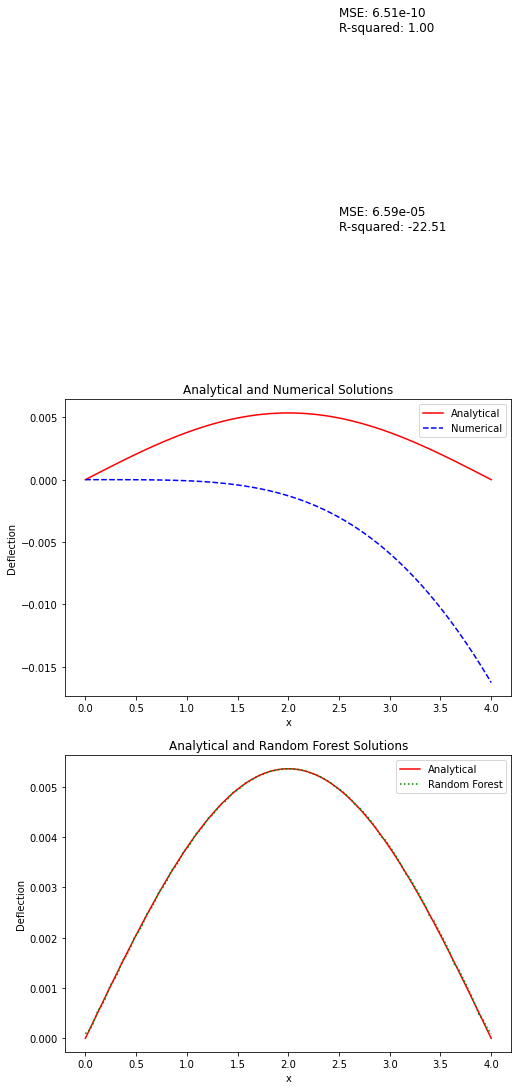

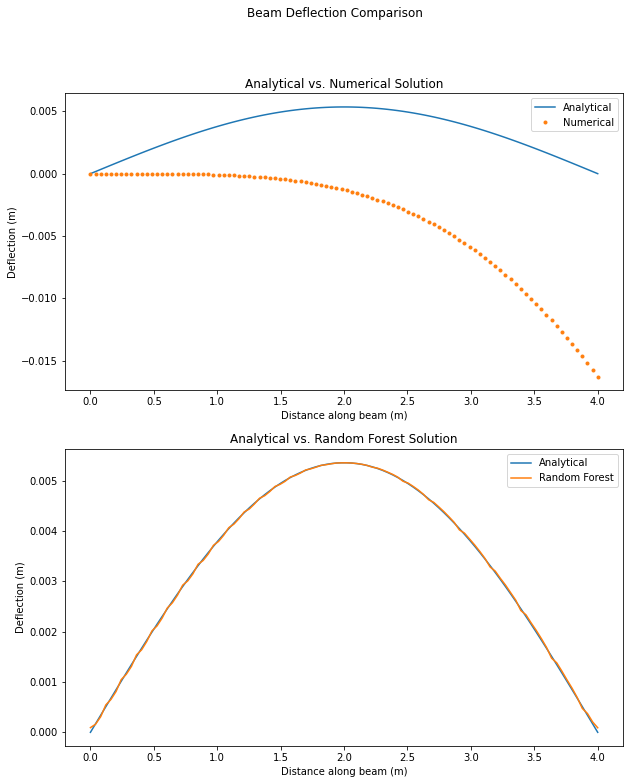

In [50]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define constants and parameters
elastic_modulus = 29000000
second_moment_area = 0.0423
cross_section_area = 0.69
density = 2.54842
point_load = 0
spring_constant = 1500
damping_coefficient = 0
beam_length = 4
distributed_load = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    deflection = y[0]
    slope = y[1]
    angle_curvature = y[2]
    distributed_load_deriv = (distributed_load / beam_length) * np.sin(np.pi * x / beam_length)
    angle_curvature_deriv = -1 / (elastic_modulus * second_moment_area) * (spring_constant * deflection + damping_coefficient * angle_curvature + (density * cross_section_area / beam_length) * distributed_load_deriv)
    slope_deriv = angle_curvature
    deflection_deriv = slope
    return deflection_deriv, slope_deriv, angle_curvature_deriv



# Analytical solution
x_values = np.linspace(0, beam_length, 100)
t_values = np.linspace(0, beam_length, 100)
x, t = np.meshgrid(x_values, t_values, indexing='ij')
w_analytical = (distributed_load*beam_length**3)/(3*elastic_modulus*second_moment_area*np.pi**4)*(np.sin(np.pi*x/beam_length) - (np.pi**2/(spring_constant*beam_length**2))*np.sin(np.pi*x/beam_length))

# Numerical solution
initial_conditions = [0, 0, 0]
t_eval = np.linspace(0, beam_length, 100)
sol = solve_ivp(beam_deflection, [0, beam_length], initial_conditions, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
w_rf = rf.predict(np.asarray(t_eval).reshape(-1, 1)).mean(axis=1)

# Generate table of results
analytical_results = pd.DataFrame({'x': x_values, 'Deflection': w_analytical[:, 0]})
numerical_results = pd.DataFrame({'x': sol.t, 'Deflection': w_numerical})
rf_results = pd.DataFrame({'x': t_eval, 'Deflection': w_rf})

# Calculate mean squared error and R-squared values
mse_numerical = mean_squared_error(analytical_results['Deflection'], numerical_results['Deflection'])
r2_numerical = r2_score(analytical_results['Deflection'], numerical_results['Deflection'])

mse_rf = mean_squared_error(analytical_results['Deflection'], rf_results['Deflection'])
r2_rf = r2_score(analytical_results['Deflection'], rf_results['Deflection'])

# Print results
print('Numerical Method:')
print('Mean Squared Error:', mse_numerical)
print('R-squared:', r2_numerical)
print()
print('Random Forest Method:')
print('Mean Squared Error:', mse_rf)
print('R-squared:', r2_rf)

# Save results to CSV files
analytical_results.to_csv('analytical_results.csv', index=False)
numerical_results.to_csv('numerical_results.csv', index=False)
rf_results.to_csv('rf_results.csv', index=False)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot the analytical and numerical solutions
axs[0].plot(x_values, w_analytical[:, 0], 'r-', label='Analytical')
axs[0].plot(sol.t, w_numerical, 'b--', label='Numerical')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Deflection')
axs[0].set_title('Analytical and Numerical Solutions')
axs[0].legend()

# Plot the random forest solution
axs[1].plot(x_values, w_analytical[:, 0], 'r-', label='Analytical')
axs[1].plot(t_eval, w_rf, 'g:', label='Random Forest')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Deflection')
axs[1].set_title('Analytical and Random Forest Solutions')
axs[1].legend()

# Add text to the plots with the MSE and R-squared values
axs[0].text(2.5, 0.02, f'MSE: {mse_numerical:.2e}\nR-squared: {r2_numerical:.2f}', fontsize=12)
axs[1].text(2.5, 0.02, f'MSE: {mse_rf:.2e}\nR-squared: {r2_rf:.2f}', fontsize=12)



# Create a figure with two subplots for the comparison plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the analytical and numerical solutions on the first subplot
axs[0].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[0].plot(numerical_results['x'], numerical_results['Deflection'], 'o', markersize=3, label='Numerical')
axs[0].set_xlabel('Distance along beam (m)')
axs[0].set_ylabel('Deflection (m)')
axs[0].set_title('Analytical vs. Numerical Solution')
axs[0].legend()

# Plot the analytical and random forest solutions on the second subplot
axs[1].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[1].plot(rf_results['x'], rf_results['Deflection'], label='Random Forest')
axs[1].set_xlabel('Distance along beam (m)')
axs[1].set_ylabel('Deflection (m)')
axs[1].set_title('Analytical vs. Random Forest Solution')
axs[1].legend()

# Add a figure title and save the figure to a file
fig.suptitle('Beam Deflection Comparison')
fig.savefig('beam_deflection_comparison.png')

plt.show()
